## Cyclistic Rider Analysis

### Introduction 

Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities 
and riders who can’t use a standard
two-wheeled bike. The majority of ridersprefer too 
traditional bike and about 8% of riders use the assistive options. Cyclistic users are more 
likely to ride for leisure, but about 30% use the bikes to commute work. 

This project aims to find out how casual riders and annual members use Cyclistic bikes differently and design a new marketing strategy to convert casual riders to annual members. 


### Purpose of this project 

* Find the factors or trend related to nubmer of members.
* Design a new marketing strategy to convert casual riders into annual 
members.

### Load libaraties and dataset 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,accuracy_score,precision_score,\
recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
df_q1q2 = pd.read_csv(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Trips_2014_Q1Q2.csv")

In [4]:
df_q1q2.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0


In [5]:
df_q1q2.shape

(905699, 12)

In [6]:
df_q3_7 = pd.read_csv(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Trips_2014-Q3-07.csv")

In [7]:
df_q3_7.shape

(410340, 12)

In [8]:
df_q3_89 = pd.read_csv(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Trips_2014-Q3-0809.csv")

In [9]:
df_q3_89.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,3810750,9/30/2014 23:59,10/1/2014 0:06,851,411,177,Theater on the Lake,143,Sedgwick St & Webster Ave,Subscriber,Male,1982.0
1,3810749,9/30/2014 23:59,10/1/2014 0:01,989,142,277,Ashland Ave & Grand Ave,285,Wood St & Grand Ave,Subscriber,Male,1983.0
2,3810748,9/30/2014 23:59,10/1/2014 0:03,261,279,48,Larrabee St & Kingsbury St,110,State St & Erie St,Subscriber,Male,1988.0
3,3810746,9/30/2014 23:58,10/1/2014 0:15,806,1031,58,Marshfield Ave & Cortland St,318,Southport Ave & Irving Park Rd,Customer,NaN,NaN
4,3810745,9/30/2014 23:58,10/1/2014 0:05,104,437,127,Lincoln Ave & Fullerton Ave,94,Clark St & Armitage Ave,Subscriber,Male,1957.0
5,3810744,9/30/2014 23:57,10/1/2014 0:18,2598,1253,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0
6,3810743,9/30/2014 23:55,10/1/2014 0:10,255,865,176,Clark St & Elm St,333,Ashland Ave & Blackhawk St,Subscriber,Male,1980.0
7,3810742,9/30/2014 23:55,9/30/2014 23:58,2518,189,117,Wilton Ave & Belmont Ave,299,Halsted St & Roscoe St,Subscriber,Male,1988.0
8,3810741,9/30/2014 23:54,10/1/2014 0:00,2739,325,117,Wilton Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
9,3810740,9/30/2014 23:51,9/30/2014 23:55,2583,259,19,Loomis St & Taylor St,274,Racine Ave & 15th St,Customer,NaN,NaN


In [11]:
df_q4 = pd.read_csv(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Trips_2014-Q4.csv")

In [12]:
df = pd.concat([df_q1q2,df_q3_7,df_q3_89,df_q4],axis=0)

In [13]:
df.shape

(2454634, 12)

## Clean data

### Check data types 

In [14]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [15]:
df = df.rename(columns = {'starttime':'start_time','stoptime':'end_time','tripduration':'duration','from_station_id':'start_station_id',
                       'from_station_name':'start_station_name','to_station_id':'end_station_id','to_station_name':'end_station_name'})

In [16]:
df.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,gender,birthyear
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0


In [17]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [18]:
df['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
df.dtypes

trip_id                        int64
start_time            datetime64[ns]
end_time              datetime64[ns]
bikeid                         int64
duration                       int64
start_station_id               int64
start_station_name            object
end_station_id                 int64
end_station_name              object
usertype                      object
gender                        object
birthyear                    float64
dtype: object

### Check duplicates

In [20]:
df[df.duplicated()]

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,gender,birthyear


**Check missing data** 

In [21]:
df.isna().sum()

trip_id                    0
start_time                 0
end_time                   0
bikeid                     0
duration                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
usertype                   0
gender                791280
birthyear             791216
dtype: int64

* There are 791280 missing values in column `gender` and 791216 ones in column `birthyear`. Since these two features are not key to members or not, it can be dropped.

In [22]:
df.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,gender,birthyear
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0


In [23]:
df = df.drop(columns=['gender','birthyear'])

In [24]:
df.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber


**Check inconsistency**

In [25]:
df['start_station_name'].value_counts()

start_station_name
Streeter Dr & Illinois St               54214
Lake Shore Dr & Monroe St               41326
Theater on the Lake                     38667
Clinton St & Washington Blvd            37755
Michigan Ave & Oak St                   34668
                                        ...  
Damen Ave & Coulter St                    294
Cottage Grove Ave & 47th St               289
Martin Luther King Dr & Oakwood Blvd      240
MLK Jr Dr & 47th St                       207
King Dr & 47th St                         118
Name: count, Length: 311, dtype: int64

In [26]:
df['end_station_name'].value_counts()

end_station_name
Streeter Dr & Illinois St               67048
Lake Shore Dr & Monroe St               42060
Theater on the Lake                     41297
Clinton St & Washington Blvd            39517
Michigan Ave & Oak St                   37422
                                        ...  
Cottage Grove Ave & 51st St               303
MLK Jr Dr & Oakwood Blvd                  253
MLK Jr Dr & 47th St                       208
Martin Luther King Dr & Oakwood Blvd      194
King Dr & 47th St                         114
Name: count, Length: 311, dtype: int64

### Check outliers

In [27]:
# change duration to minutes

In [28]:
df['duration'] = round(df['duration']/60,0)

In [29]:
df.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber


In [29]:
df.describe()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,end_station_id
count,2.454634e+06,2454634,2454634,2.454634e+06,2.454634e+06,2.454634e+06,2.454634e+06
mean,2.775521e+06,2014-07-25 07:56:10.006314752,2014-07-25 08:13:14.948142848,1.552573e+03,1.708183e+01,1.608376e+02,1.608794e+02
min,1.109420e+06,2014-01-01 00:17:00,2014-01-01 00:42:00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
25%,1.976969e+06,2014-06-06 00:12:00,2014-06-06 00:31:15,7.880000e+02,7.000000e+00,7.400000e+01,7.500000e+01
50%,2.772476e+06,2014-07-25 14:52:00,2014-07-25 15:13:00,1.578000e+03,1.200000e+01,1.520000e+02,1.500000e+02
75%,3.574490e+06,2014-09-14 04:54:00,2014-09-14 05:33:45,2.310000e+03,2.000000e+01,2.460000e+02,2.470000e+02
max,4.413167e+06,2014-12-31 23:54:00,2015-01-01 00:38:00,3.047000e+03,1.440000e+03,3.510000e+02,3.510000e+02
std,9.316569e+05,NaN,NaN,8.712249e+02,3.178577e+01,9.926846e+01,9.950958e+01


* There are outliers in several columns. Boxplot can observe outliers and histogram can help me figure out desitribution 

In [30]:
# function of  box plot 

In [30]:
def boxploter(column_str):
    plt.figure(figsize = (7,3))
    sns.boxplot(x = df[column_str])
    plt.title(f'{column_str} boxplot');

#### **`duration`**

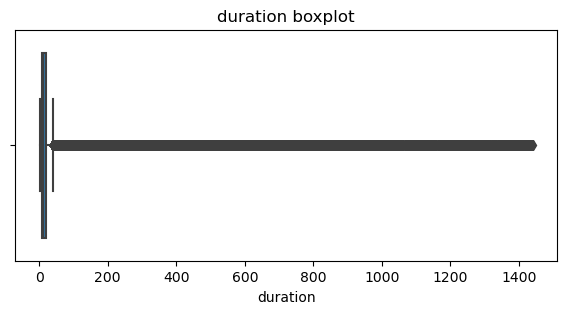

In [31]:
boxploter('duration')

(array([921155., 868402., 434396., 113790.,  40998.,  22810.,  13027.,
          8601.,   6118.,   4534.,   3500.,   2989.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120.]),
 <BarContainer object of 12 artists>)

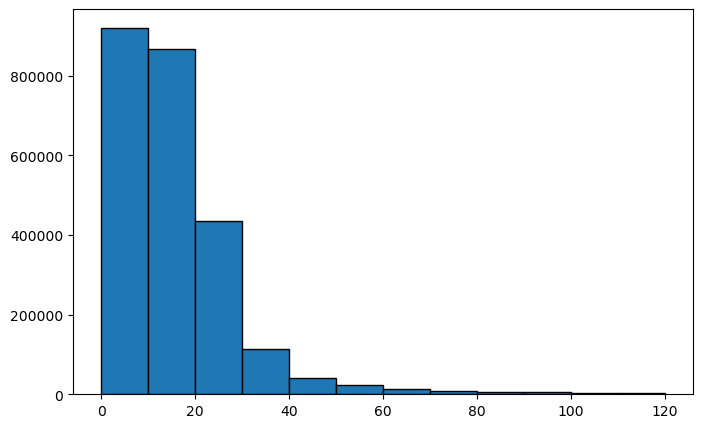

In [33]:
plt.figure(figsize = (8,5))
plt.hist(x = df['duration'],bins = range(0,126,10),edgecolor ='black')

* There are some outliers and some values are bigger than 100.
* The distribution of `duration` is right_skewed.

(array([ 47939., 203207., 546771., 929210., 597723.,  97618.,  23941.,
          5481.,   1371.,   1373.]),
 array([0.        , 0.72723984, 1.45447968, 2.18171952, 2.90895936,
        3.6361992 , 4.36343904, 5.09067887, 5.81791871, 6.54515855,
        7.27239839]),
 <BarContainer object of 10 artists>)

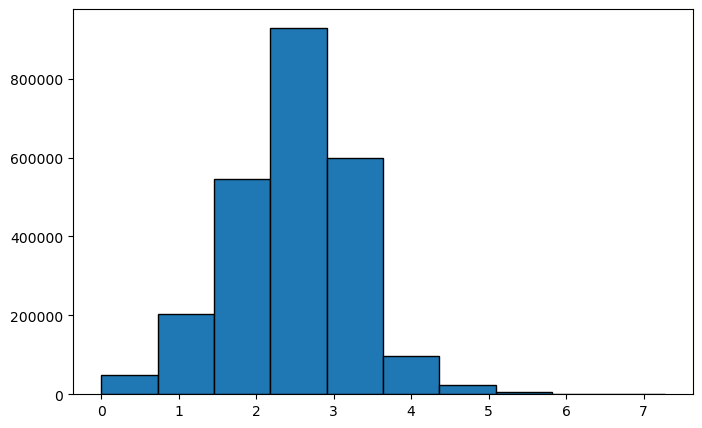

In [32]:
plt.figure(figsize = (8,5))
plt.hist(x = np.log(df['duration']),edgecolor ='black')

* After calculate log value of the data, it is approxiately noramlly distributed and there are outleries from left or right sides.

In [33]:
#Observe outliers 
df['duration'].describe()

count    2.454634e+06
mean     1.708183e+01
std      3.178577e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.000000e+01
max      1.440000e+03
Name: duration, dtype: float64

In [34]:
q1 = 7
q2 = 12
q3 = 20
iqr = q3-q1

In [35]:
20 + 6*iqr

98

In [36]:
# Any number less than 10 is not reasonable because cycling usually takes more than 2 minutes 
df_new = df[((df['duration'] >= 2) & (df['duration'] < 98))]

In [37]:
df_new.describe()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,end_station_id
count,2.425781e+06,2425781,2425781,2.425781e+06,2.425781e+06,2.425781e+06,2.425781e+06
mean,2.777286e+06,2014-07-25 10:46:20.751312896,2014-07-25 11:01:37.137615360,1.552600e+03,1.527312e+01,1.607895e+02,1.608561e+02
min,1.109420e+06,2014-01-01 00:17:00,2014-01-01 00:42:00,1.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00
25%,1.978096e+06,2014-06-06 07:33:00,2014-06-06 07:45:00,7.890000e+02,7.000000e+00,7.400000e+01,7.500000e+01
50%,2.775183e+06,2014-07-25 16:58:00,2014-07-25 17:15:00,1.578000e+03,1.200000e+01,1.520000e+02,1.500000e+02
75%,3.577802e+06,2014-09-14 12:34:00,2014-09-14 12:54:00,2.310000e+03,2.000000e+01,2.450000e+02,2.470000e+02
max,4.413167e+06,2014-12-31 23:54:00,2015-01-01 00:38:00,3.047000e+03,9.700000e+01,3.510000e+02,3.510000e+02
std,9.324991e+05,NaN,NaN,8.712182e+02,1.193191e+01,9.923746e+01,9.947797e+01


In [38]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber


In [39]:
data=df_new['usertype'].value_counts()

Text(0.5, 1.0, 'usertype')

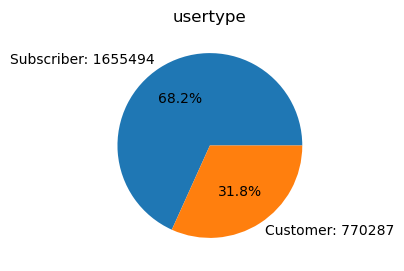

In [40]:
# Pie chart
fig=plt.figure(figsize=(3,3))
data=df_new['usertype'].value_counts()
plt.pie(data,
         labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%')
plt.title('usertype')

* There are more than twice as many Subscribers as Customers represented in this data.

### Create new features 

In [41]:
top_20_start_station = df_new['start_station_name'].value_counts().head(20).reset_index()

In [42]:
top_20_start_station

,start_station_name,count
0,Streeter Dr & Illinois St,53271
1,Lake Shore Dr & Monroe St,40567
2,Theater on the Lake,38235
3,Clinton St & Washington Blvd,37555
4,Michigan Ave & Oak St,33761
5,Millennium Park,31289
6,Canal St & Madison St,30121
7,Canal St & Adams St,30001
8,Lake Shore Dr & North Blvd,28823
9,Columbus Dr & Randolph St,26465


Text(0, 0.5, 'Start Station Name')

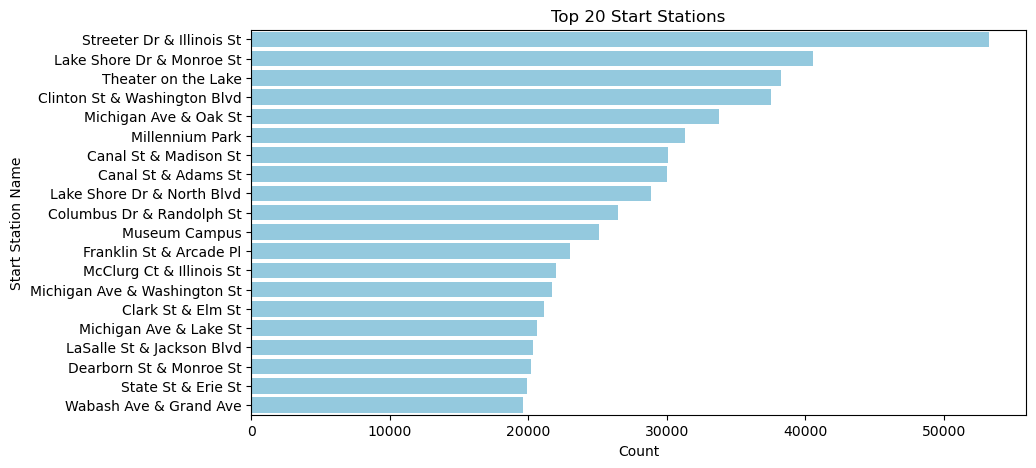

In [43]:
# Bar plot of top 20 start stations
plt.figure(figsize = (10,5))
sns.barplot(data = top_20_start_station, x='count', y='start_station_name', orient='h', color='skyblue')
plt.title('Top 20 Start Stations')
plt.xlabel('Count')
plt.ylabel('Start Station Name')


In [44]:
bottom_10_start_station = df_new['start_station_name'].value_counts().tail(10).reset_index()
bottom_10_start_station

,start_station_name,count
0,Cottage Grove Ave & 43rd St,445
1,Halsted St & 37th St,392
2,MLK Jr Dr & Oakwood Blvd,321
3,Cottage Grove Ave & 51st St,310
4,Damen Ave & Coulter St,287
5,Indiana Ave & 40th St,283
6,Cottage Grove Ave & 47th St,274
7,Martin Luther King Dr & Oakwood Blvd,227
8,MLK Jr Dr & 47th St,198
9,King Dr & 47th St,111


* Streeter Dr & llinois St is the most popular station that people like to start their riding .

In [45]:
top_20_start_station = df_new['start_station_name'].value_counts().head(20).reset_index()

Text(0, 0.5, 'Start Station Name')

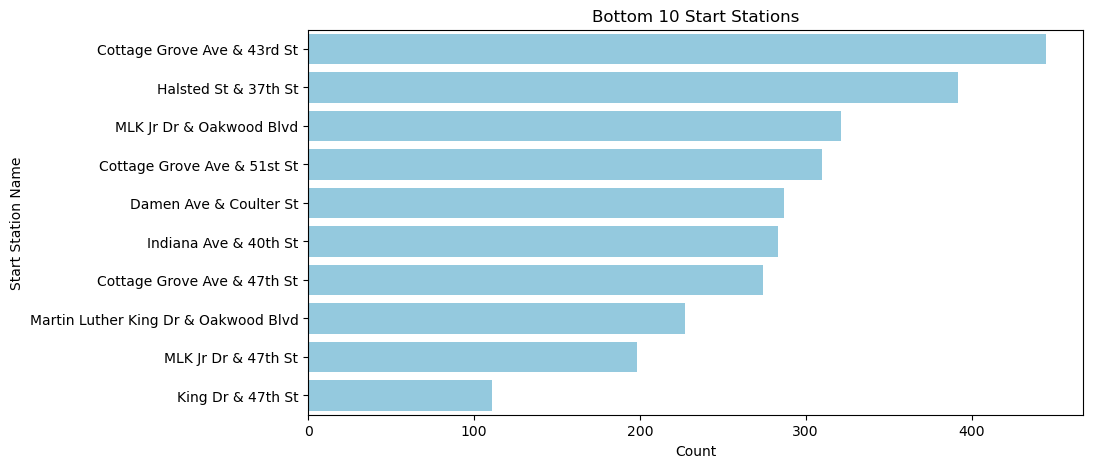

In [46]:
# Bar plot of bottom 10 start stations
plt.figure(figsize=(10,5))
sns.barplot(data=bottom_10_start_station, x='count', y='start_station_name', orient='h', color='skyblue')
plt.title('Bottom 10 Start Stations')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

* The above 10 stations only have less than 300 people starting there throughout the whole year, which is less than 1 for each day.

In [47]:
top_20_end_station = df_new['end_station_name'].value_counts().head(20).reset_index()
top_20_end_station

,end_station_name,count
0,Streeter Dr & Illinois St,65851
1,Lake Shore Dr & Monroe St,41288
2,Theater on the Lake,40842
3,Clinton St & Washington Blvd,39352
4,Michigan Ave & Oak St,36470
5,Millennium Park,34698
6,Canal St & Madison St,34431
7,Lake Shore Dr & North Blvd,32189
8,Canal St & Adams St,28943
9,Museum Campus,26603


Text(0, 0.5, 'End Station Name')

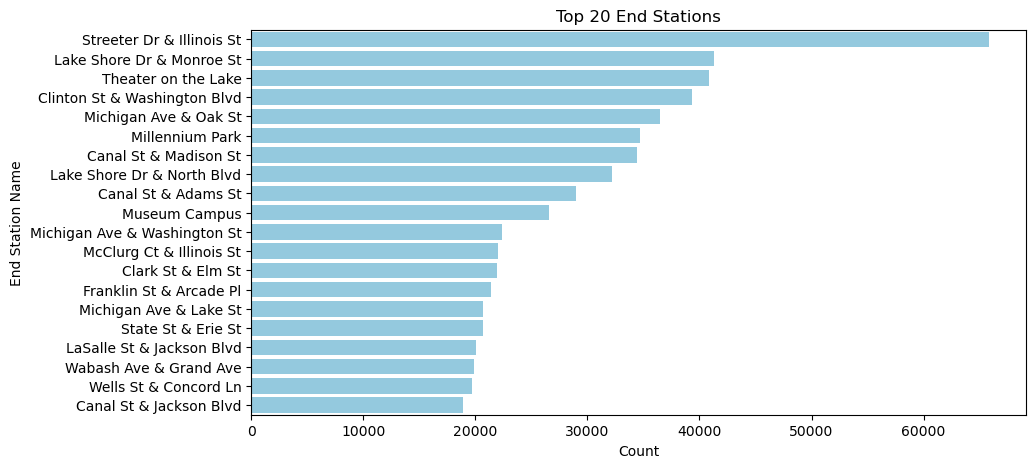

In [48]:
# Bar plot of top 20 start stations
plt.figure(figsize=(10,5))
sns.barplot(data=top_20_end_station, x='count', y='end_station_name', orient='h', color='skyblue')
plt.title('Top 20 End Stations')
plt.xlabel('Count')
plt.ylabel('End Station Name')

In [49]:
bottom_10_end_station = df_new['end_station_name'].value_counts().tail(10).reset_index()
bottom_10_end_station

,end_station_name,count
0,Halsted St & 37th St,466
1,Cottage Grove Ave & 43rd St,407
2,Damen Ave & Coulter St,374
3,Indiana Ave & 40th St,371
4,Cottage Grove Ave & 47th St,337
5,Cottage Grove Ave & 51st St,286
6,MLK Jr Dr & Oakwood Blvd,233
7,MLK Jr Dr & 47th St,199
8,Martin Luther King Dr & Oakwood Blvd,184
9,King Dr & 47th St,106


Text(0, 0.5, 'End Station Name')

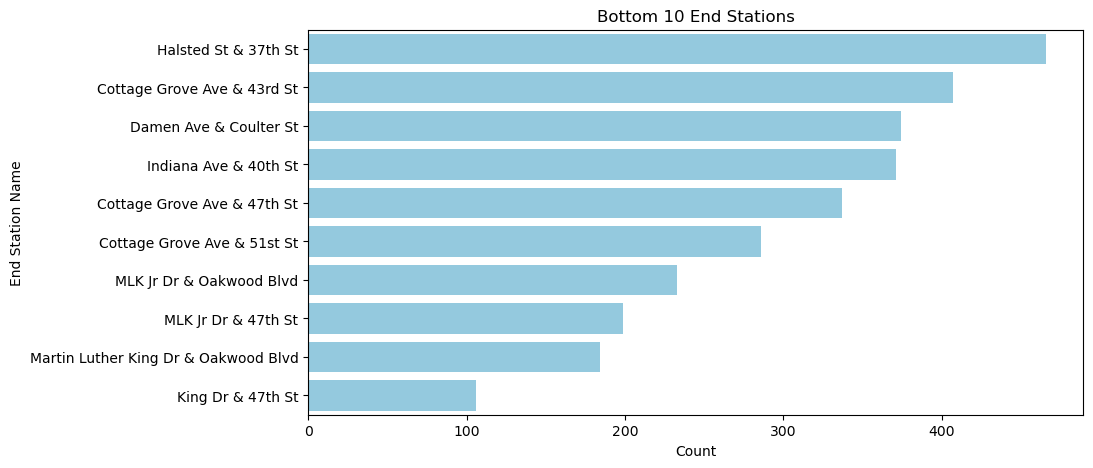

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=bottom_10_end_station, x='count', y='end_station_name', orient='h', color='skyblue')
plt.title('Bottom 10 End Stations')
plt.xlabel('Count')
plt.ylabel('End Station Name')

In [51]:
start_station_num = df.groupby('start_station_id')['trip_id'].count().reset_index() \
                  .rename(columns={'trip_id':'start_station_count'})
start_station_num

,start_station_id,start_station_count
0,5,8815
1,13,8842
2,14,3217
3,15,3782
4,16,5947
...,...,...
295,347,4289
296,348,585
297,349,7501
298,350,4460


In [52]:
end_station_num = df.groupby('end_station_id')['trip_id'].count().reset_index()\
                 .rename(columns={'trip_id':'end_station_count'})

In [53]:
end_station_num

,end_station_id,end_station_count
0,5,8998
1,13,8486
2,14,2990
3,15,3638
4,16,5934
...,...,...
295,347,4167
296,348,713
297,349,7083
298,350,4599


In [54]:
station = pd.DataFrame([start_station_num['start_station_id'],start_station_num['start_station_count']+ end_station_num['end_station_count']]).T
station

,start_station_id,Unnamed 0
0,5,17813
1,13,17328
2,14,6207
3,15,7420
4,16,11881
...,...,...
295,347,8456
296,348,1298
297,349,14584
298,350,9059


In [55]:
station = station.rename(columns={'start_station_id':'id','Unnamed 0':'station_count'})
station

,id,station_count
0,5,17813
1,13,17328
2,14,6207
3,15,7420
4,16,11881
...,...,...
295,347,8456
296,348,1298
297,349,14584
298,350,9059


In [56]:
station_q1q2 = pd.read_excel(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Stations_2014-Q1Q2.xlsx")

In [57]:
station_q1q2

,id,name,latitude,longitude,dpcapacity,online date
0,43,Michigan Ave & Washington St,41.883893,-87.624649,43,2013-06-16
1,44,State St & Randolph St,41.884730,-87.627734,27,2013-06-16
2,33,State St & Van Buren St,41.877181,-87.627844,27,2013-06-25
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15,2013-08-10
4,51,Clark St & Randolph St,41.884576,-87.631890,31,2013-06-17
...,...,...,...,...,...,...
295,181,LaSalle St & Illinois St,41.890749,-87.632060,31,2013-07-21
296,341,Adler Planetarium,41.866095,-87.607267,19,2013-10-09
297,285,Wood St & Grand Ave,41.891130,-87.672030,15,2013-09-13
298,277,Ashland Ave & Grand Ave,41.891072,-87.666611,15,2013-09-12


In [58]:
station_q3q4 = pd.read_csv(r"C:\Users\clair\google analytic certificate data\csv data\Divvy_Stations_2014-Q3Q4.csv")
station_q3q4

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55
...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,10/4/2013 16:06
296,348,California Ave & 21st St,41.854016,-87.695445,15,10/9/2013 16:13
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,10/10/2013 12:40
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,10/10/2013 14:22


In [59]:
station_info = pd.concat([station_q1q2,station_q3q4],axis=0)
station_info

,id,name,latitude,longitude,dpcapacity,online date,dateCreated
0,43,Michigan Ave & Washington St,41.883893,-87.624649,43,2013-06-16,NaN
1,44,State St & Randolph St,41.884730,-87.627734,27,2013-06-16,NaN
2,33,State St & Van Buren St,41.877181,-87.627844,27,2013-06-25,NaN
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15,2013-08-10,NaN
4,51,Clark St & Randolph St,41.884576,-87.631890,31,2013-06-17,NaN
...,...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,NaT,10/4/2013 16:06
296,348,California Ave & 21st St,41.854016,-87.695445,15,NaT,10/9/2013 16:13
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,NaT,10/10/2013 12:40
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,NaT,10/10/2013 14:22


In [60]:
station_info = station_info.drop(columns=['dpcapacity','online date','dateCreated'])

In [61]:
station_info

,id,name,latitude,longitude
0,43,Michigan Ave & Washington St,41.883893,-87.624649
1,44,State St & Randolph St,41.884730,-87.627734
2,33,State St & Van Buren St,41.877181,-87.627844
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937
4,51,Clark St & Randolph St,41.884576,-87.631890
...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700
296,348,California Ave & 21st St,41.854016,-87.695445
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747


In [62]:
station_info = station_info.drop_duplicates()

In [63]:
station_info

,id,name,latitude,longitude
0,43,Michigan Ave & Washington St,41.883893,-87.624649
1,44,State St & Randolph St,41.884730,-87.627734
2,33,State St & Van Buren St,41.877181,-87.627844
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937
4,51,Clark St & Randolph St,41.884576,-87.631890
...,...,...,...,...
247,299,Halsted St & Roscoe St,41.943670,-87.648950
248,300,Broadway & Barry Ave,41.937725,-87.644095
255,307,Southport Ave & Clybourn Ave,41.920445,-87.663095
259,311,Leavitt St & Lawrence Ave,41.968885,-87.684001


In [64]:
station_info['id'].value_counts()

id
43     2
299    2
54     2
49     2
60     2
      ..
132    1
273    1
20     1
88     1
351    1
Name: count, Length: 300, dtype: int64

In [65]:
station_unique = station_info.drop_duplicates(subset='id', keep='first')

In [66]:
station_unique

,id,name,latitude,longitude
0,43,Michigan Ave & Washington St,41.883893,-87.624649
1,44,State St & Randolph St,41.884730,-87.627734
2,33,State St & Van Buren St,41.877181,-87.627844
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937
4,51,Clark St & Randolph St,41.884576,-87.631890
...,...,...,...,...
295,181,LaSalle St & Illinois St,41.890749,-87.632060
296,341,Adler Planetarium,41.866095,-87.607267
297,285,Wood St & Grand Ave,41.891130,-87.672030
298,277,Ashland Ave & Grand Ave,41.891072,-87.666611


In [67]:
df_newer=pd.merge(station,station_unique,how='inner',on='id')

In [68]:
df_newer

,id,station_count,name,latitude,longitude
0,5,17813,State St & Harrison St,41.873958,-87.627739
1,13,17328,Wilton Ave & Diversey Pkwy,41.932500,-87.652681
2,14,6207,Morgan St & 18th St,41.858086,-87.651073
3,15,7420,Racine Ave & 18th St,41.858181,-87.656487
4,16,11881,Wood St & North Ave,41.910329,-87.672516
...,...,...,...,...,...
295,347,8456,Ashland Ave & Grace St,41.950687,-87.668700
296,348,1298,California Ave & 21st St,41.854016,-87.695445
297,349,14584,Halsted St & Wrightwood Ave,41.929143,-87.649077
298,350,9059,Ashland Ave & Chicago Ave,41.895966,-87.667747


In [69]:
df_newer=df_newer.sort_values(by='station_count', ascending = False)
df_newer.head(20)

,id,station_count,name,latitude,longitude
22,35,121262,Streeter Dr & Illinois St,41.891071,-87.612200
55,76,83386,Lake Shore Dr & Monroe St,41.880958,-87.616743
134,177,79964,Theater on the Lake,41.926277,-87.630834
65,91,77272,Clinton St & Washington Blvd,41.883380,-87.641170
60,85,72090,Michigan Ave & Oak St,41.900960,-87.623777
64,90,67556,Millennium Park,41.881032,-87.624084
131,174,64927,Canal St & Madison St,41.882091,-87.639833
218,268,61821,Lake Shore Dr & North Blvd,41.911722,-87.626804
145,192,59247,Canal St & Adams St,41.878948,-87.639750
69,97,52479,Museum Campus,41.865212,-87.617759


In [70]:
df_newer['day_average_count']=round(df_newer['station_count']/366,1)

Text(0, 0.5, 'Station Name')

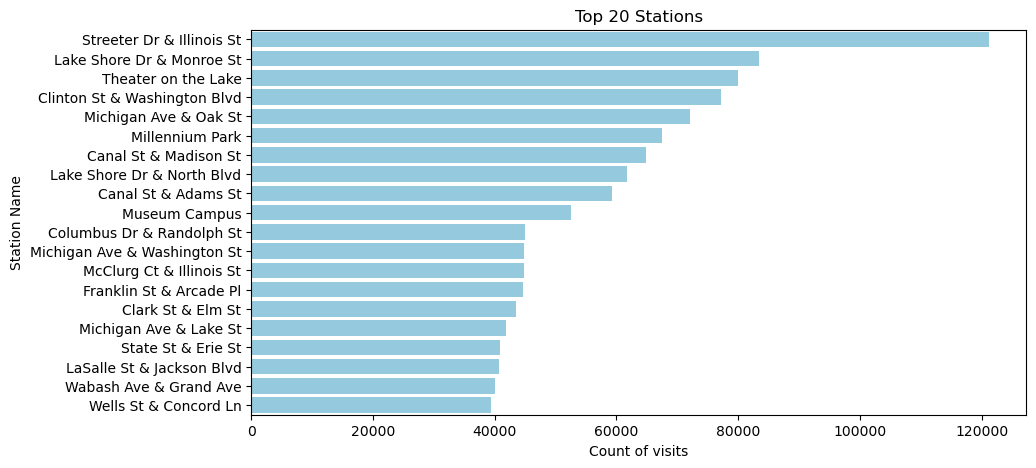

In [71]:
# Bar plot of top 20  stations
plt.figure(figsize=(10,5))
sns.barplot(data=df_newer.head(20), x='station_count', y='name', orient='h', color='skyblue')
plt.title('Top 20 Stations')
plt.xlabel('Count of visits')
plt.ylabel('Station Name')

* Streeter Dr & Illinois St is the most popular station with approxiately 331.3 people starting or ending there on average.
* The second popular station is Lake Shore Dr & Monroe St with approxiately 227.8 people starting or ending there on average.
* The third popular station is Theater on the Lake with approxiately 218.5 people starting or ending there on average.
* All the above statements suggest that some stations such as Streeter Dr & Illinois St,Clinton St & Washington Blvd, Lake Shore Dr & Monroe St probably need to be expanded or more stations needed to build around those locations.


In [72]:
df_newer.tail(10)

,id,station_count,name,latitude,longitude,day_average_count
283,335,1106,Calumet Ave & 35th St,41.831379,-87.618034,3.0
229,281,1047,Western Ave & 24th St,41.848470,-87.685109,2.9
136,179,1028,Martin Luther King Dr & Oakwood Blvd,41.822560,-87.616150,2.8
219,271,899,Cottage Grove Ave & 43rd St,41.816499,-87.606582,2.5
213,262,882,Halsted St & 37th St,41.827071,-87.645801,2.4
154,201,710,Indiana Ave & 40th St,41.821680,-87.621600,1.9
125,167,672,Damen Ave & Coulter St,41.849200,-87.675640,1.8
153,200,647,King Dr & 47th St,41.809851,-87.616279,1.8
284,336,641,Cottage Grove Ave & 47th St,41.809855,-87.606755,1.8
299,351,634,Cottage Grove Ave & 51st St,41.803038,-87.606615,1.7


Text(0, 0.5, 'Station Name')

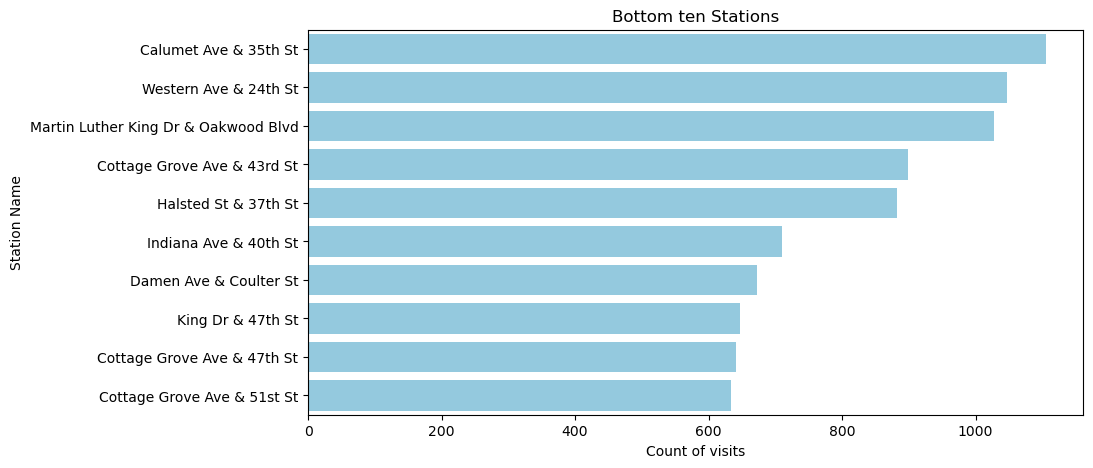

In [73]:
# Bar bottom 10  stations
plt.figure(figsize=(10,5))
sns.barplot(data=df_newer.tail(10), x='station_count', y='name', orient='h', color='skyblue')
plt.title('Bottom ten Stations')
plt.xlabel('Count of visits')
plt.ylabel('Station Name')

* There are 5 stations with less than 2 people starting or ending from there, which suggests that probably these stations needed to be removed.

In [74]:
df_new

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber
...,...,...,...,...,...,...,...,...,...,...
437960,3810756,2014-10-01 00:01:00,2014-10-01 00:16:00,1122,14.0,253,Clifton Ave & Lawrence Ave,114,Sheffield Ave & Addison St,Subscriber
437961,3810754,2014-10-01 00:02:00,2014-10-01 00:10:00,1531,8.0,113,Bissell St & Armitage Ave,340,Clark St & Wrightwood Ave,Subscriber
437962,3810753,2014-10-01 00:02:00,2014-10-01 00:16:00,2707,14.0,332,Halsted St & Diversey Pkwy,333,Ashland Ave & Blackhawk St,Subscriber
437963,3810752,2014-10-01 00:01:00,2014-10-01 00:05:00,2059,4.0,92,Carpenter St & Huron St,29,Noble St & Milwaukee Ave,Subscriber


In [75]:
# create 'startid_endid'column 
df_new = df_new.copy()
df_new['startid_endid'] = df_new['start_station_id'].astype(str) + ' ' + df_new['end_station_id'].astype(str)
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134


In [76]:
grouped = df_new.groupby('startid_endid')['duration'].mean().reset_index()
grouped = grouped.set_index(grouped.columns[0])
grouped

,duration
startid_endid,
100 100,21.436482
100 106,11.657534
100 108,13.142857
100 109,15.000000
100 110,8.662338
...,...
99 93,25.500000
99 94,25.405172
99 97,25.977337


In [77]:
grouped_dict=grouped.to_dict()['duration']
grouped_dict

{'100 100': 21.436482084690553,
 '100 106': 11.657534246575343,
 '100 108': 13.142857142857142,
 '100 109': 15.0,
 '100 110': 8.662337662337663,
 '100 111': 5.356060606060606,
 '100 112': 9.868852459016393,
 '100 113': 17.729166666666668,
 '100 114': 28.666666666666668,
 '100 115': 30.576923076923077,
 '100 116': 21.583333333333332,
 '100 117': 30.09090909090909,
 '100 118': 12.289473684210526,
 '100 119': 24.444444444444443,
 '100 120': 25.666666666666668,
 '100 122': 16.5,
 '100 123': 25.5625,
 '100 124': 28.0,
 '100 126': 20.224489795918366,
 '100 127': 20.6,
 '100 128': 17.5,
 '100 129': 21.333333333333332,
 '100 13': 26.333333333333332,
 '100 130': 19.714285714285715,
 '100 131': 25.333333333333332,
 '100 132': 20.0,
 '100 134': 11.319148936170214,
 '100 136': 19.5,
 '100 137': 17.2,
 '100 138': 11.472222222222221,
 '100 14': 26.0,
 '100 140': 10.522988505747126,
 '100 141': 16.247191011235955,
 '100 143': 18.652173913043477,
 '100 144': 16.914285714285715,
 '100 146': 14.375,
 '1

In [78]:
df_new['mean_duration']=df_new['startid_endid'].map(grouped_dict)

In [79]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732


***Create `day` and `month` columns***

In [80]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732


In [81]:
df_new['mean_duration'].describe()

count    2.425781e+06
mean     1.527312e+01
std      8.253664e+00
min      2.391304e+00
25%      8.775362e+00
50%      1.373684e+01
75%      2.060377e+01
max      9.700000e+01
Name: mean_duration, dtype: float64

In [82]:
### mean_duration vs. usertype

Text(0.5, 1.0, 'mean duration per day by usertype histogram')

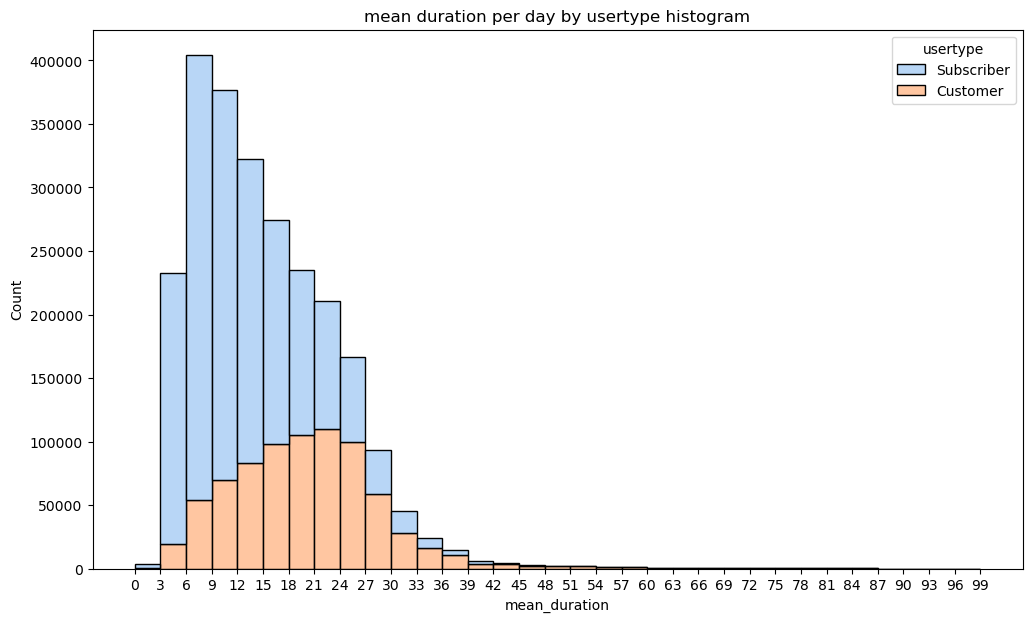

In [83]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df_new, x='mean_duration', bins=range(0,100,3), 
                  hue='usertype', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,102,3))        
ax.set_xticklabels(range(0,102,3))
plt.title('mean duration per day by usertype histogram')

* Majority customers mean duration per day is between 15 minutes to 30 minutes. There are more customers than subscribers when the mean duration per day is above 24 minutes 

In [84]:
df_new['day']=df_new['start_time'].dt.day_name()
df_new['month']=df_new['start_time'].dt.month_name()

In [85]:
monthly_rides=df_new['month'].value_counts()
monthly_rides

month
July         404803
August       386990
June         341239
September    305468
May          274373
October      235367
April        156517
November     113238
December      86288
March         68669
February      27902
January       24927
Name: count, dtype: int64

In [86]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June


In [87]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_rides=monthly_rides.reindex(index=month_order)
monthly_rides

month
January       24927
February      27902
March         68669
April        156517
May          274373
June         341239
July         404803
August       386990
September    305468
October      235367
November     113238
December      86288
Name: count, dtype: int64

C:\Users\clair\AppData\Local\Temp\ipykernel_7912\1974051565.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


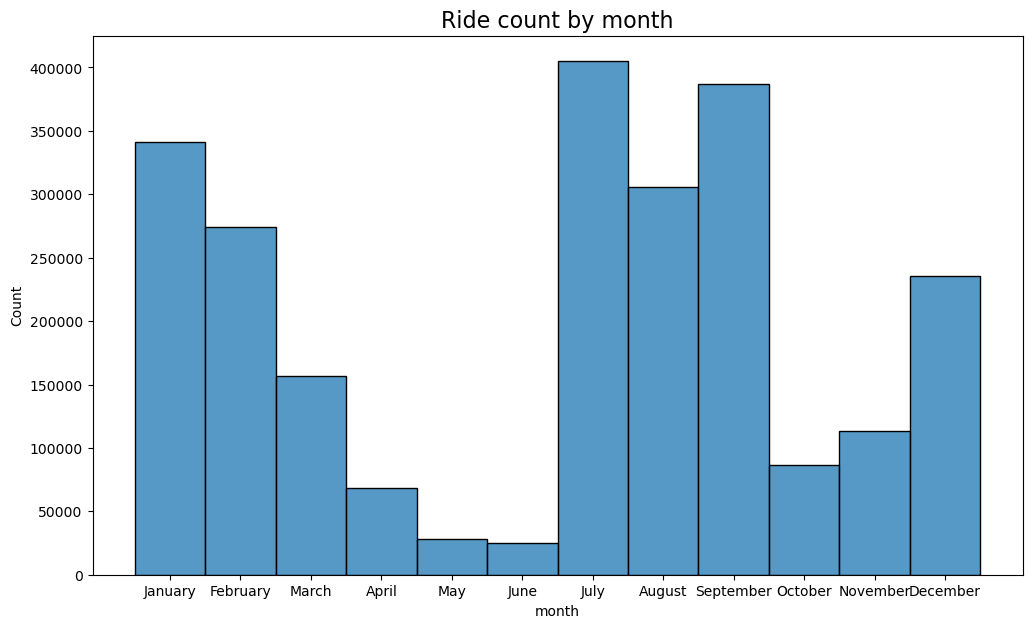

In [88]:
# Create a hist plot of total rides per month
plt.figure(figsize=(12,7))
ax=sns.histplot(data=df_new,x='month',)
ax.set_xticklabels(month_order)
plt.title('Ride count by month',fontsize=16);

Text(0.5, 1.0, 'number of subscribers vs. customers in terms of  usertype histogram')

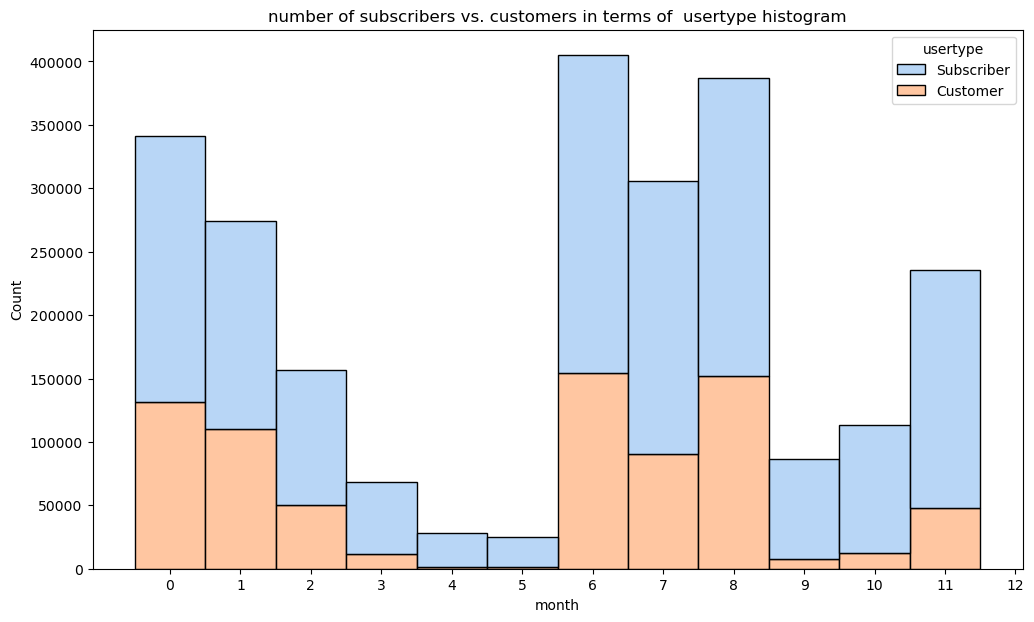

In [89]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df_new, x='month', bins=range(0,15,1), 
                  hue='usertype', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,13,1))        
ax.set_xticklabels(range(0,13,1))
plt.title('number of subscribers vs. customers in terms of  usertype histogram')

* The most popular months are July and Semptember. However, the number of people who are subscriber is twice more than that of customers.
* It is weird that May and June are the least popular month and no customer appeared at all.

Text(0.5, 1.0, 'mean duration per day by usertype histogram')

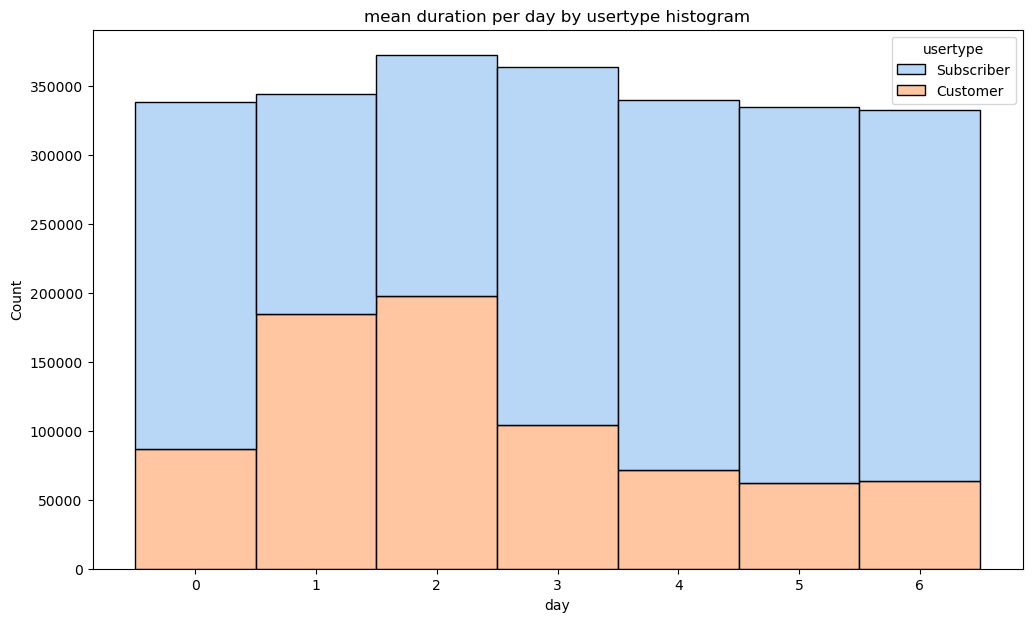

In [90]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df_new, x='day', bins=range(0,7,1), 
                  hue='usertype', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,7,1))        
ax.set_xticklabels(range(0,7,1))
plt.title('mean duration per day by usertype histogram')

* The number of people doesn\'t vary much in terms of day. The most popular day is Tuesday and there are approximately equal numbers of members and subscribers at that day.
* Wednesday is the second popular one. However, subscribers is much more than members at that day.

In [91]:
df_newer.head()

,id,station_count,name,latitude,longitude,day_average_count
22,35,121262,Streeter Dr & Illinois St,41.891071,-87.612200,331.3
55,76,83386,Lake Shore Dr & Monroe St,41.880958,-87.616743,227.8
134,177,79964,Theater on the Lake,41.926277,-87.630834,218.5
65,91,77272,Clinton St & Washington Blvd,41.883380,-87.641170,211.1
60,85,72090,Michigan Ave & Oak St,41.900960,-87.623777,197.0


In [92]:
dict_result = pd.DataFrame(df_newer, columns=['id', 'latitude', 'longitude']).set_index('id').T.to_dict()
print(dict_result)

{35: {'latitude': 41.891071, 'longitude': -87.6122}, 76: {'latitude': 41.880958, 'longitude': -87.616743}, 177: {'latitude': 41.926277, 'longitude': -87.630834}, 91: {'latitude': 41.88338, 'longitude': -87.64117}, 85: {'latitude': 41.90096039, 'longitude': -87.62377664}, 90: {'latitude': 41.8810317, 'longitude': -87.62408432}, 174: {'latitude': 41.882091, 'longitude': -87.639833}, 268: {'latitude': 41.911722, 'longitude': -87.626804}, 192: {'latitude': 41.878948, 'longitude': -87.63975}, 97: {'latitude': 41.865212, 'longitude': -87.617759}, 195: {'latitude': 41.884728, 'longitude': -87.619521}, 43: {'latitude': 41.8838927658, 'longitude': -87.6246491409}, 26: {'latitude': 41.89102, 'longitude': -87.6173}, 287: {'latitude': 41.881469, 'longitude': -87.635177}, 176: {'latitude': 41.903233, 'longitude': -87.631253}, 52: {'latitude': 41.886024, 'longitude': -87.624117}, 110: {'latitude': 41.893975, 'longitude': -87.628623}, 283: {'latitude': 41.87817, 'longitude': -87.631985}, 199: {'latit

In [93]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June


In [94]:
df_new['start_station_geo']=df_new['start_station_id'].map(dict_result)
df_new['end_station_geo']=df_new['end_station_id'].map(dict_result)

In [95]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month,start_station_geo,end_station_geo
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June,"{'latitude': 41.939365, 'longitude': -87.668385}","{'latitude': 41.945512, 'longitude': -87.64598}"
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June,"{'latitude': 41.86458, 'longitude': -87.64693}","{'latitude': 41.8694821, 'longitude': -87.6554..."
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June,"{'latitude': 41.921687, 'longitude': -87.653714}","{'latitude': 41.919936, 'longitude': -87.64883}"
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June,"{'latitude': 41.877749, 'longitude': -87.649633}","{'latitude': 41.887155, 'longitude': -87.62775}"
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June,"{'latitude': 41.872187, 'longitude': -87.661501}","{'latitude': 41.877749, 'longitude': -87.649633}"


In [96]:
import math

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance in kilometers
    distance = R * c
    return distance

# Assuming 'start_station_geo' and 'end_station_geo' contain dictionaries with 'latitude' and 'longitude'
# Sample DataFrame df_new (replace this with your actual DataFrame)
# Example format of 'start_station_geo' and 'end_station_geo': {'latitude': 41.939365, 'longitude': -87.668385}

# Function to calculate the distance for each pair of coordinates
def calculate_distance(row):
    lat1, lon1 = row['start_station_geo']['latitude'], row['start_station_geo']['longitude']
    lat2, lon2 = row['end_station_geo']['latitude'], row['end_station_geo']['longitude']
    return haversine(lat1, lon1, lat2, lon2)

# Apply the function to each row of the DataFrame and create a new 'distance' column
df_new['distance'] = df_new.apply(calculate_distance, axis=1)



In [102]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month,start_station_geo,end_station_geo,distance,mean_distance
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June,"{'latitude': 41.939365, 'longitude': -87.668385}","{'latitude': 41.945512, 'longitude': -87.64598}",1.975127,1.975127
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June,"{'latitude': 41.86458, 'longitude': -87.64693}","{'latitude': 41.8694821, 'longitude': -87.6554...",0.893940,0.893940
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June,"{'latitude': 41.921687, 'longitude': -87.653714}","{'latitude': 41.919936, 'longitude': -87.64883}",0.448547,0.448547
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June,"{'latitude': 41.877749, 'longitude': -87.649633}","{'latitude': 41.887155, 'longitude': -87.62775}",2.091854,2.091854
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June,"{'latitude': 41.872187, 'longitude': -87.661501}","{'latitude': 41.877749, 'longitude': -87.649633}",1.161056,1.161056


In [137]:
df_new['distance'].describe()

count    2.425781e+06
mean     1.976898e+00
std      1.466707e+00
min      0.000000e+00
25%      9.367382e-01
50%      1.576824e+00
75%      2.657678e+00
max      2.081782e+01
Name: distance, dtype: float64

### Check outlkiers in column `distance`

In [140]:
def boxploter(column_str):
    plt.figure(figsize = (7,3))
    sns.boxplot(x = df_new[column_str])
    plt.title(f'{column_str} boxplot');

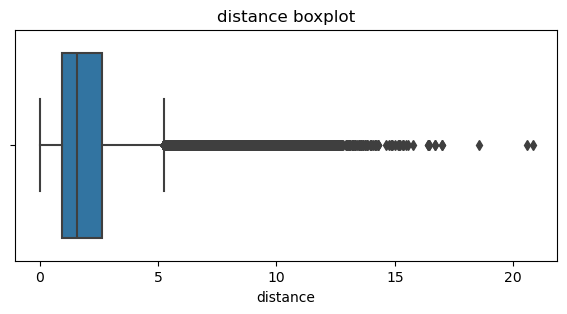

In [141]:
boxploter('distance')

(array([6.59692e+05, 8.55161e+05, 4.31357e+05, 2.29255e+05, 1.38320e+05,
        6.64180e+04, 2.62980e+04, 9.79600e+03, 5.06600e+03, 2.41700e+03,
        1.41000e+03, 4.20000e+02, 9.50000e+01, 4.20000e+01, 1.20000e+01,
        1.10000e+01, 8.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 19 artists>)

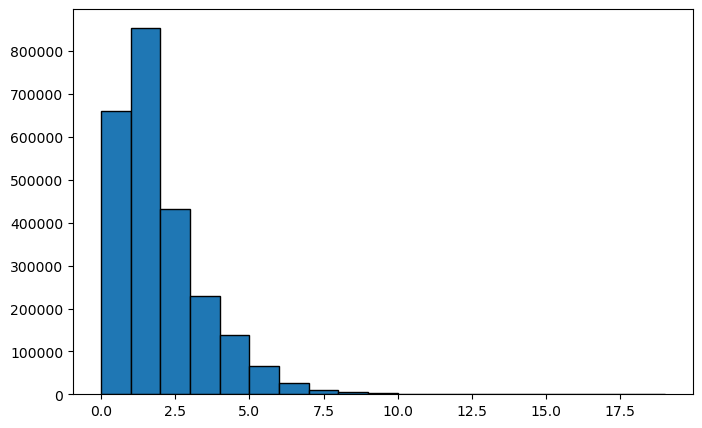

In [143]:
plt.figure(figsize = (8,5))
plt.hist(x = df_new['distance'],bins = range(0,20,1),edgecolor ='black')

In [146]:
df_new=df_new[df_new['distance']>0]

(array([2.86100e+03, 2.48250e+04, 1.35027e+05, 3.71691e+05, 6.04744e+05,
        5.94828e+05, 4.33361e+05, 1.60350e+05, 1.35840e+04, 1.08000e+02]),
 array([-2.11076453, -1.59610714, -1.08144974, -0.56679235, -0.05213496,
         0.46252244,  0.97717983,  1.49183722,  2.00649462,  2.52115201,
         3.0358094 ]),
 <BarContainer object of 10 artists>)

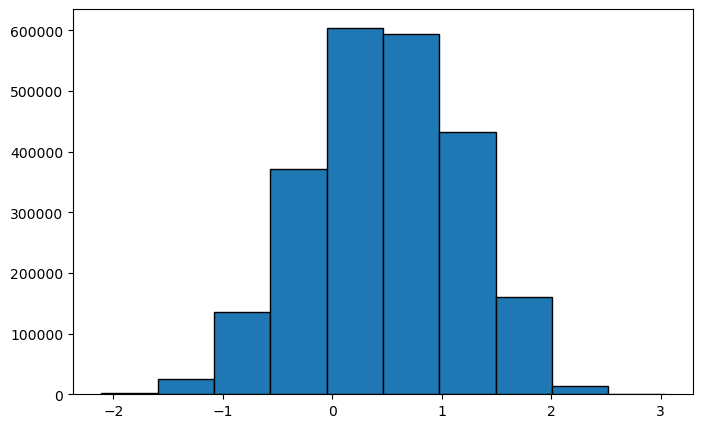

In [147]:
plt.figure(figsize = (8,5))
plt.hist(x = np.log(df_new['distance']),edgecolor ='black')

In [103]:
grouped1 = df_new.groupby('startid_endid')['distance'].mean().reset_index()
grouped1 = grouped1.set_index(grouped1.columns[0])
grouped1

,distance
startid_endid,
100 100,0.000000
100 106,1.204367
100 108,2.011674
100 109,1.883944
100 110,0.905306
...,...
99 93,3.948942
99 94,3.382480
99 97,3.054072


In [104]:
grouped1_dict=grouped1.to_dict()['distance']
grouped1_dict

{'100 100': 0.0,
 '100 106': 1.2043674443950536,
 '100 108': 2.0116738226351294,
 '100 109': 1.8839440402635173,
 '100 110': 0.9053061468032486,
 '100 111': 0.7340290734460762,
 '100 112': 1.1181388224521198,
 '100 113': 3.604277570845609,
 '100 114': 6.689179269442795,
 '100 115': 5.524424894047571,
 '100 116': 5.175667589485012,
 '100 117': 5.937189302290852,
 '100 118': 2.490485852210273,
 '100 119': 2.579714137293008,
 '100 120': 3.7630411120269502,
 '100 122': 3.390020948676459,
 '100 123': 6.321541810751034,
 '100 124': 4.922664108930179,
 '100 126': 2.6643219651577006,
 '100 127': 4.3211336973521,
 '100 128': 3.4817306683128426,
 '100 129': 3.997248327846162,
 '100 13': 5.1024633935664045,
 '100 130': 3.7519472097944555,
 '100 131': 6.270774727578221,
 '100 132': 4.354510167634626,
 '100 134': 1.6011088925842203,
 '100 136': 3.0901175994353496,
 '100 137': 3.1220806981689306,
 '100 138': 1.8404088467048514,
 '100 14': 3.5668831198839563,
 '100 140': 1.3109779294212824,
 '100 141

In [105]:
df_new['mean_distance']=df_new['startid_endid'].map(grouped1_dict)

In [106]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month,start_station_geo,end_station_geo,distance,mean_distance
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June,"{'latitude': 41.939365, 'longitude': -87.668385}","{'latitude': 41.945512, 'longitude': -87.64598}",1.975127,1.975127
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June,"{'latitude': 41.86458, 'longitude': -87.64693}","{'latitude': 41.8694821, 'longitude': -87.6554...",0.893940,0.893940
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June,"{'latitude': 41.921687, 'longitude': -87.653714}","{'latitude': 41.919936, 'longitude': -87.64883}",0.448547,0.448547
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June,"{'latitude': 41.877749, 'longitude': -87.649633}","{'latitude': 41.887155, 'longitude': -87.62775}",2.091854,2.091854
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June,"{'latitude': 41.872187, 'longitude': -87.661501}","{'latitude': 41.877749, 'longitude': -87.649633}",1.161056,1.161056


Text(0.5, 1.0, 'mean distance per day by usertype histogram')

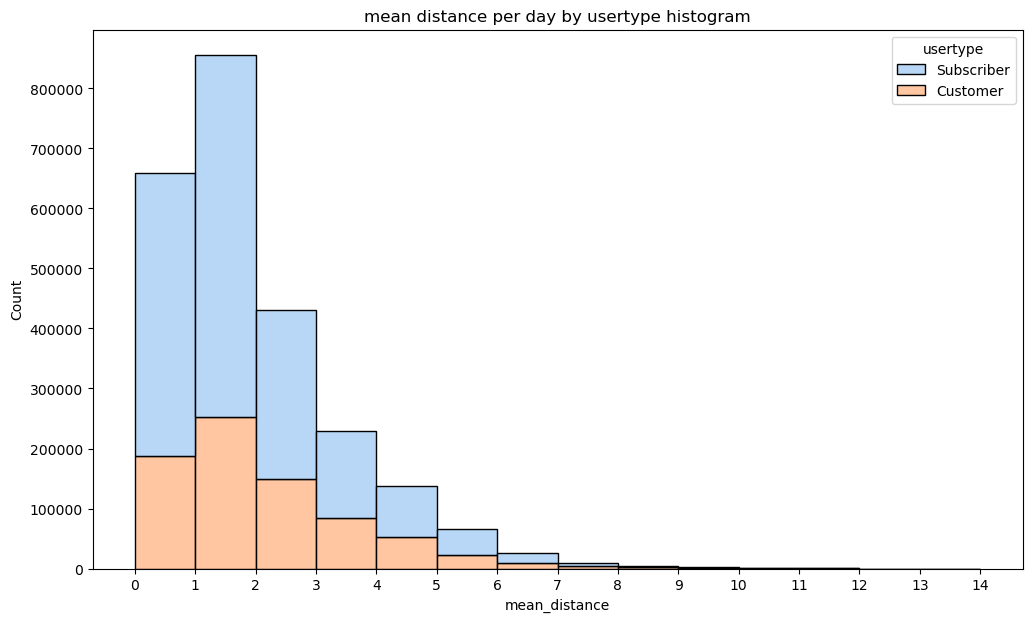

In [107]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df_new, x='mean_distance', bins=range(0,15,1), 
                  hue='usertype', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,15,1))        
ax.set_xticklabels(range(0,15,1))
plt.title('mean distance per day by usertype histogram')

* It seems there is no obvious trends between mean distance and the number of subscribes or customers.
A lot of people travels among 1 kilometers to 2 kilometers.

## Set up statistical models

### Linear regression model-- A/B test

#### convert categorical value to  numeric ones

In [108]:
df_new['usertype'].value_counts()

usertype
Subscriber    1655494
Customer       770287
Name: count, dtype: int64

In [109]:
# 1. Create `map_dictionary`
map_dictionary={'Subscriber': 0,'Customer': 1}
# 2. Create new `device_type` column
# 3. Map the new column to the dictionary
df_new['user_type']=df_new['usertype'].map(map_dictionary)
# trnasform the categorical variable into numerical value
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month,start_station_geo,end_station_geo,distance,mean_distance,user_type
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June,"{'latitude': 41.939365, 'longitude': -87.668385}","{'latitude': 41.945512, 'longitude': -87.64598}",1.975127,1.975127,0
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June,"{'latitude': 41.86458, 'longitude': -87.64693}","{'latitude': 41.8694821, 'longitude': -87.6554...",0.893940,0.893940,0
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June,"{'latitude': 41.921687, 'longitude': -87.653714}","{'latitude': 41.919936, 'longitude': -87.64883}",0.448547,0.448547,0
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June,"{'latitude': 41.877749, 'longitude': -87.649633}","{'latitude': 41.887155, 'longitude': -87.62775}",2.091854,2.091854,0
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June,"{'latitude': 41.872187, 'longitude': -87.661501}","{'latitude': 41.877749, 'longitude': -87.649633}",1.161056,1.161056,0


In [110]:
# average duration with respect to usertype
df_new.groupby('user_type')['duration'].mean()

user_type
0    11.412816
1    23.569642
Name: duration, dtype: float64

In [111]:
# average distance with respect to usertype
df_new.groupby('user_type')['distance'].mean()

user_type
0    1.912124
1    2.116112
Name: distance, dtype: float64

* Based on the averages shown, it appears that the mean duration of Customers is more than twice of the mean duration of Subscribefers.

#### **Hypothesis testing**


$H_o$: The averge duration of Subscriber and Customers are the same. 

$H_1$:The averge duration of Subscriber and Customers are not the same. 

Next, choose 5% as the significance level and proceed with a two-sample t-test.

In [112]:
# 1. Isolate the `Subscribers` column for usertype.
df_new_subscriber=df_new[df_new['user_type']== 0]['mean_duration']
# 2. Isolate the `Members` column for usertype.
df_new_customer= df_new[df_new['user_type']== 1]['mean_duration']
# 3. Perform the t-test
stats.ttest_ind(a=df_new_subscriber,b=df_new_customer,equal_var=False) # a, b must be 


TtestResult(statistic=-610.3727620813471, pvalue=0.0, df=1246224.9305772968)

Since the p-value is significant small than 0.05, $H_o$ should be rejected. 
There is statistically there is significant difference between the average duration between  users who is Subscriber or Customer.

In [113]:
# 1. Isolate the `drives` column for iPhone users.
df_new_subscriber=df_new[df_new['user_type']== 0]['distance']
# 2. Isolate the `drives` column for Android users.
df_new_customer= df_new[df_new['user_type']== 1]['distance']
# 3. Perform the t-test
stats.ttest_ind(a=df_new_subscriber,b=df_new_customer,equal_var=False)

TtestResult(statistic=-95.3574965390274, pvalue=0.0, df=1309110.8021661676)

Since the p-value is significant small than 0.05, $H_o$ should be rejected. 
There is statistically there is significant difference between the average distance between  users who is Subscriber or Customer.

In [114]:
df_new.head()

,trip_id,start_time,end_time,bikeid,duration,start_station_id,start_station_name,end_station_id,end_station_name,usertype,startid_endid,mean_duration,day,month,start_station_geo,end_station_geo,distance,mean_distance,user_type
0,2355134,2014-06-30 23:57:00,2014-07-01 00:07:00,2006,10.0,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,131 303,12.155556,Monday,June,"{'latitude': 41.939365, 'longitude': -87.668385}","{'latitude': 41.945512, 'longitude': -87.64598}",1.975127,1.975127,0
1,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,4.0,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,282 22,7.795031,Monday,June,"{'latitude': 41.86458, 'longitude': -87.64693}","{'latitude': 41.8694821, 'longitude': -87.6554...",0.893940,0.893940,0
2,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,2.0,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,327 225,5.614815,Monday,June,"{'latitude': 41.921687, 'longitude': -87.653714}","{'latitude': 41.919936, 'longitude': -87.64883}",0.448547,0.448547,0
3,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,58.0,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,134 194,15.640000,Monday,June,"{'latitude': 41.877749, 'longitude': -87.649633}","{'latitude': 41.887155, 'longitude': -87.62775}",2.091854,2.091854,0
4,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,11.0,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,320 134,7.757732,Monday,June,"{'latitude': 41.872187, 'longitude': -87.661501}","{'latitude': 41.877749, 'longitude': -87.649633}",1.161056,1.161056,0


### Logistic regression model

In [116]:
data=df_new[['mean_duration','mean_distance','user_type']]
data.head()

,mean_duration,mean_distance,user_type
0,12.155556,1.975127,0
1,7.795031,0.893940,0
2,5.614815,0.448547,0
3,15.640000,2.091854,0
4,7.757732,1.161056,0


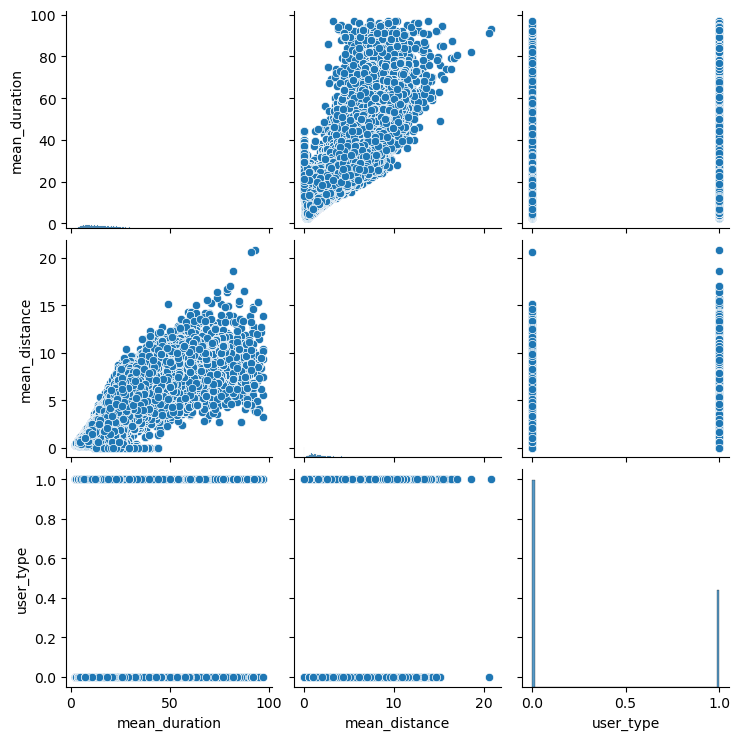

In [117]:
sns.pairplot(data)

### **Determine whether assumptions have been met**
The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y


### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [119]:
X=data[['mean_duration','mean_distance']]

In [120]:
y=data['user_type']

#### **Split the data**

In [121]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [122]:
# Use .head()
X_train.head()

,mean_duration,mean_distance
64749,7.561224,1.268221
435851,9.150000,1.608469
300763,3.720698,0.354612
370037,4.997143,0.419278
455360,6.094241,0.880456


In [124]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)


LogisticRegression(max_iter=400, penalty='none')

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**."


In [125]:
pd.Series(model.coef_[0], index=X.columns)

mean_duration    0.207003
mean_distance   -0.690559
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [126]:
model.intercept_

array([-2.65628227])

 To make predictions on the test data, the code below is needed 

In [127]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [128]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.7723292758135102

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [129]:
cm = confusion_matrix(y_test, y_preds)

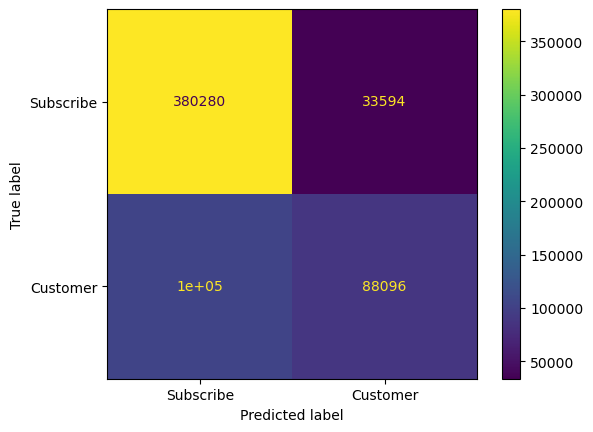

In [130]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['Subscribe', 'Customer'],
                              )
disp.plot();

In [131]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.723937874928096

In [132]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.4574704526099329

In [133]:
# Create a classification report
target_labels = ['Subscribe', 'Customer']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

   Subscribe       0.78      0.92      0.85    413874
    Customer       0.72      0.46      0.56    192572

    accuracy                           0.77    606446
   macro avg       0.75      0.69      0.70    606446
weighted avg       0.77      0.77      0.76    606446



In [135]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('mean_duration', 0.2070025820720314), ('mean_distance', -0.6905585278154854)]

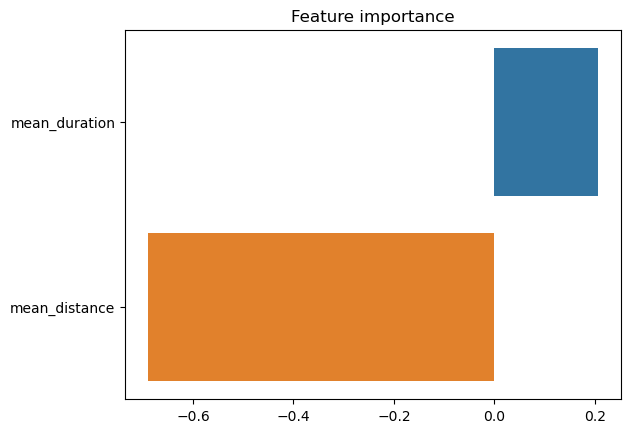

In [136]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

## Business insights

* There are 17 stations where people started or ended at more than 20,000 times thought the year 2024. The top 3 are  Streeter Dr & Illinois St,Lake Shore Dr & Monroe St 40567
  and Theater on the Lake, which suggets that these stations needed to be expaned or more stations needed to be setup around those stations.
* There are 5 stations with less than 2 people starting or ending from there, which suggests that probably these stations needed to be removed.
* The number of people doesn\'t vary much in terms of day. The most popular day is Tuesday and there are approximately equal numbers of members and     subscribers at that day. Wednesday is the second popular oen, however, subscribers is much more than members.
* The most popular months are July and Semptember. However, the number of people who are subscriber is twice more than that of cunstomers.
  It is weird that May and June are the least popular month and no customer appeared at all.
* From A/B tests, mean_distance and mean_duration are correrated `with user_type`.
* From logistic test, the accuracy of the prediction is  approximately 72.4%.